In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_excel ('H-1B_Disclosure_Data_FY2019.xlsx') #for an earlier version of Excel, you may need to use the file extension of 'xls'

### Data Cleaning 

In [37]:
clean = df.dropna(axis=1,thresh = df.shape[0]/3)

In [38]:
clean = clean.query('VISA_CLASS == "H-1B"')

In [5]:
clean = clean.query('CASE_STATUS != "WITHDRAWN"')

In [6]:
clean.shape

(629857, 46)

### Data Analysis

### 1. Case Status

In [7]:
clean.groupby('CASE_STATUS')['CASE_STATUS'].count()

CASE_STATUS
CERTIFIED              584269
CERTIFIED-WITHDRAWN     40422
DENIED                   5166
Name: CASE_STATUS, dtype: int64

### 2. Employment Start & End Date

#### a. Time length of the employment for these applications

In [8]:
clean['diff'] = clean.EMPLOYMENT_END_DATE-clean.EMPLOYMENT_START_DATE

#### b. How often does an applicant need to renew their visa?

In [9]:
clean.groupby('diff')['CASE_STATUS'].count()

diff
-1 days      4
1 days       7
2 days       2
3 days       2
4 days       7
            ..
1112 days    1
1126 days    1
1165 days    1
1357 days    1
1460 days    5
Name: CASE_STATUS, Length: 1105, dtype: int64

In [10]:
clean[clean['diff'] == '-1 days +00:00:00']

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B,diff
213743,I-200-19064-915612,DENIED,2019-03-05,2019-03-11,H-1B,2019-09-01,2019-08-31,VSION TECHNOLOGIES INC.,507 DENALI PASS SUITE 602,CEDAR PARK,...,116000.0,Year,Y,Princeton,Mercer,NJ,08540,N,Y,-1 days
265353,I-200-19228-946322,DENIED,2019-08-26,2019-08-27,H-1B,2019-08-23,2019-08-22,"SERVICENOW, INC.",2225 LAWSON LANE,SANTA CLARA,...,140000.0,Year,N,Santa Clara,Santa Clara,CA,95054,N,NaN,-1 days
320518,I-200-19158-430239,DENIED,2019-06-07,2019-06-11,H-1B,2019-11-29,2019-11-28,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,MOUNTAIN VIEW,...,204000.0,Year,N,Mountain View,Santa Clara,CA,94043,N,NaN,-1 days
491745,I-200-19260-866082,DENIED,2019-09-17,2019-09-18,H-1B,2019-09-17,2019-09-16,CIBER GLOBAL LLC,3270 WEST BIG BEAVER ROAD,TROY,...,NaN,Year,N,Baton Rouge,East Baton Rouge Parish,LA,70802,N,NaN,-1 days


In [11]:
clean_timediff = clean[clean['diff'] != '-1 days +00:00:00']

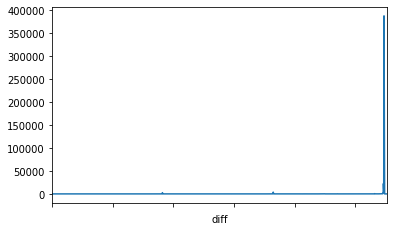

In [12]:
clean_timediff.groupby('diff')['CASE_STATUS'].count().plot()

In [13]:
len(clean_timediff.groupby('diff')['CASE_STATUS'].count())

1104

In [14]:
clean_timediff.groupby('diff')['CASE_STATUS'].count().idxmax()

Timedelta('1095 days 00:00:00')

In [15]:
(clean_timediff.groupby('diff')['CASE_STATUS'].count().max())/clean_timediff.shape[0]*100

61.629618339517314

### 3.

### 4.

### 5.  Employment Title/Categories (JOB_TITLE/SOC_CODE/SOC_NAME)

Since the variable JOB_TITLE is quite specific and contains a lot of keywords that are not easy to group by, we discovered that the first 2 digits of SOC_CODE indicates the subcategory of a job. So by extracting that and maping with the offical list, we can divide those job positions into major categories.

In [16]:
clean.SOC_CODE.str[0:2].value_counts().count()
clean.SOC_CODE.str[0:2].value_counts()

24

15    442841
17     49915
13     46221
19     23661
11     21727
29     15991
25     15273
27      6996
41      3171
23      2245
21      1175
43       327
39        78
35        55
53        42
51        37
47        33
49        26
31        16
33        11
45         6
37         3
12         2
OP         1
Name: SOC_CODE, dtype: int64

In [131]:
# Found that there is one unusual value 'OP'. With further examination, we found that the input was incorrectly aligned. So the SOC_CODE is in the SOC_NAME column.
clean.loc[clean.SOC_CODE.str[0:2]=='OP'].SOC_CODE='15-2031'
clean.loc[clean.SOC_CODE.str[0:2]=='OP'].SOC_CODE

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


487525    OPERATIONS RESEARCH ANALYSTS
Name: SOC_CODE, dtype: object

clean.SOC_CODE.replace({'OPERATIONS RESEARCH ANALYSTS':15-2031},inplace=True)

In [133]:
dict = {'11' : 'Management Occupations',
'13' : 'Business and Financial Operations Occupations',
'15' : 'Computer and Mathematical Occupations',
'17' : 'Architecture and Engineering Occupations',
'19' : 'Life, Physical, and Social Science Occupations',
'21' : 'Community and Social Service Occupations',
'23' : 'Legal Occupations',
'25' : 'Education, Training, and Library Occupations',
'27' : 'Arts, Design, Entertainment, Sports, and Media Occupations',
'29' : 'Healthcare Practitioners and Technical Occupations',
'31' : 'Healthcare Support Occupations',
'33' : 'Protective Service Occupations',
'35' : 'Food Preparation and Serving Related Occupations',
'37' : 'Building and Grounds Cleaning and Maintenance Occupations',
'39' : 'Personal Care and Service Occupations',
'41' : 'Sales and Related Occupations',
'43' : 'Office and Administrative Support Occupations',
'45' : 'Farming, Fishing, and Forestry Occupations',
'47' : 'Construction and Extraction Occupations',
'49' : 'Installation, Maintenance, and Repair Occupations',
'51' : 'Production Occupations',
'53' : 'Transportation and Material Moving Occupations'}

In [134]:
clean['JOB_TYPE']=clean.SOC_CODE.str[0:2].map(dict)

([<matplotlib.patches.Wedge at 0x175fa2d10>,
 [Text(-0.6523284962909962, 0.8857017178072581, ''),
  Text(-0.05631967332140326, -1.098557278614534, ''),
  Text(0.45771665187032695, -1.0002477026220145, ''),
  Text(0.7722473089876134, -0.7833480029727464, ''),
  Text(0.9290427015804161, -0.5889649044214453, ''),
  Text(1.0231096339594246, -0.4040379646758611, ''),
  Text(1.073619624018898, -0.23945960603308541, ''),
  Text(1.0936247608278342, -0.11825769532788441, ''),
  Text(1.0982314493809786, -0.06235129181143782, ''),
  Text(1.0995226051446636, -0.032404332671606785, ''),
  Text(1.0999177166440908, -0.013454241429755891, ''),
  Text(1.0999878255142272, -0.005175299071780239, ''),
  Text(1.0999961301437953, -0.002917819164196045, ''),
  Text(1.0999978231476009, -0.0021883945118956884, ''),
  Text(1.0999987374502718, -0.0016666156750552938, ''),
  Text(1.099999306323566, -0.0012353492113019008, ''),
  Text(1.09999967004275, -0.0008520010806509549, ''),
  Text(1.0999998710893817, -0.000

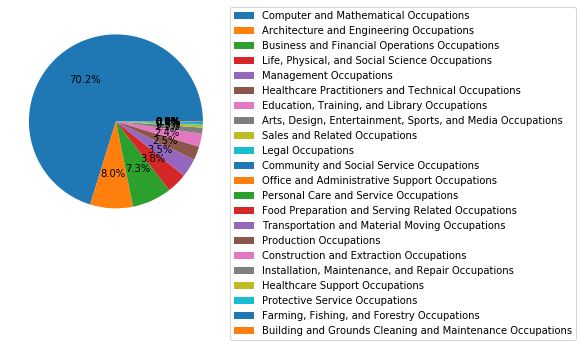

In [135]:
plt.pie(clean['JOB_TYPE'].value_counts(normalize=True), autopct='%.1f%%')
plt.legend(clean['JOB_TYPE'].value_counts(normalize=True).index,bbox_to_anchor=(1, 1.05))

### 3.Employer Location (City, Postal Code, etc.)

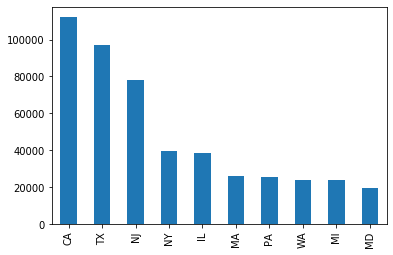

In [22]:
clean.EMPLOYER_STATE.value_counts().head(10).plot.bar()
# The top 3 states with most job opportunities are California, Texas, and New Jersey.

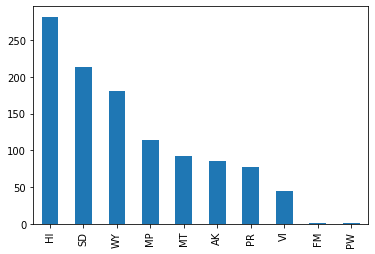

In [23]:
clean.EMPLOYER_STATE.value_counts().tail(10).plot.bar()
# The top 3 areas with least job opportunities are Palau, Federated States of Micronesia, and Virgin Islands.

In [24]:
#clean.EMPLOYER_POSTAL_CODE.str[0].value_counts()[0:10].plot.bar()
index=clean.EMPLOYER_POSTAL_CODE.str[0].str.isdigit()
index=index.fillna(False)
# The first digit of zip codes represents the national area. (US is divided into 9 differents regions in this way) We ignore all the zip codes not starting with a digit of 0-9.

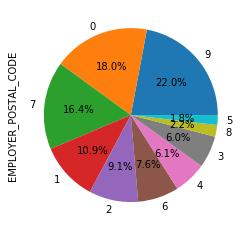

In [25]:
clean[index.tolist()].EMPLOYER_POSTAL_CODE.str[0].value_counts(normalize=True).plot.pie(autopct='%.1f%%')
# We can see codes starting with 9 gets the highest job opportunities. 9 represents the west coast regions and some outlying islands. This makes sense because it includes states like CA and WA.
# The following high frequency regions starts with 0 and 7, with 0 representing the New England region and 1 being Arkansas, Louisiana, Oklahoma, Texas.
# https://smartystreets.com/docs/zip-codes-101

### 8.Employee Location (WORKSITE_CITY/COUNTY)

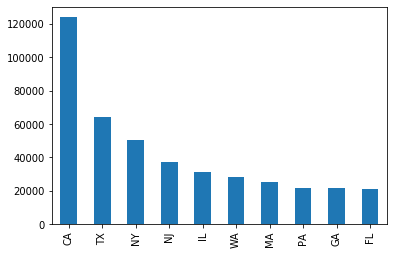

In [26]:
clean.WORKSITE_STATE.value_counts().head(10).plot.bar()
# The top 3 states with most job opportunities are California, Texas, and New York.

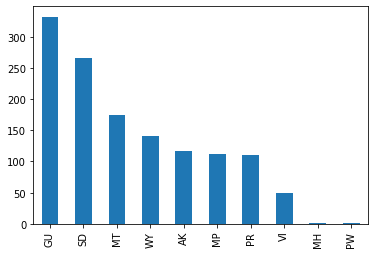

In [27]:
clean.WORKSITE_STATE.value_counts().tail(10).plot.bar()
# The top 3 areas with least job opportunities are Palau, Marshall Islands, and Virgin Islands.

In [28]:
index=clean.WORKSITE_POSTAL_CODE.str[0].str.isdigit()
index=index.fillna(False)

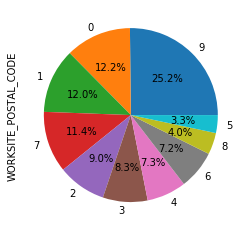

In [29]:
clean[index.tolist()].WORKSITE_POSTAL_CODE.str[0].value_counts(normalize=True).plot.pie(autopct='%.1f%%')
# We can see areas with code that starts with 9 are the most desired working area among employees. 9 represents the west coast regions and some outlying islands. This makes sense because it includes states like CA and WA.
# The following high frequency regions starts with 0 and 1, with 0 representing the New England region and 1 being Delaware, New York, and Pennsylvania.
# The overall distribution matches the job opportunity locations pretty well.
# https://smartystreets.com/docs/zip-codes-101

In [30]:
clean.EMPLOYER_POSTAL_CODE.str[0].value_counts()
nondigit_index=np.logical_not(clean.EMPLOYER_POSTAL_CODE.str[0].str.isdigit())
clean[nondigit_index.tolist()].EMPLOYER_POSTAL_CODE
# Deal with inccorect postal codes, since there's just 94 observations with incorrect format, which is less than 1% of our data, we can choose to drop those values.
#clean.loc[clean[nondigit_index.tolist()].EMPLOYER_POSTAL_CODE.index].EMPLOYER_STATE

9    138801
0    113105
7    102975
1     68412
2     57488
6     48019
4     38230
3     37509
8     13745
5     11470
V        21
S        19
N        14
C         9
M         7
L         5
K         3
H         3
D         2
F         2
E         2
A         1
B         1
R         1
O         1
W         1
P         1
J         1
Name: EMPLOYER_POSTAL_CODE, dtype: int64

964       LOS ANGELES
10437           MOORE
38263        MA 01453
58760            COOK
59446            KING
             ...     
641007       NEW YORK
646961    SANTA CLARA
648035       NEW YORK
656651       NEW YORK
656781           COOK
Name: EMPLOYER_POSTAL_CODE, Length: 94, dtype: object

#Form ETA 9035/9035E, Labor condition application (LCA), is a document that a prospective H-1B employer files with ETA when it seeks to employ nonimmigrant workers at a specific job occupation in an area of intended employment for not more than three years. In this document, the employer attests to standards to which it will adhere.

In [67]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

[4 5 8 ... 3 4 3]


In [171]:
clean.H1B_DEPENDENT.value_counts(dropna=False)
# drop those observations with missing H1B_DEPENDENT values
df=clean.dropna(subset=['H1B_DEPENDENT'])

df['INDUSTRY_CODE']=df.SOC_CODE.str[0:2]
df = df.query('INDUSTRY_CODE != "OP"')
df = df[np.isnan(df.INDUSTRY_CODE.astype(float))==False]


# subset to only the correctly formatted postal codes (starts with 0-9)
index=df.EMPLOYER_POSTAL_CODE.str[0].str.isdigit()
index=index.fillna(False)

soc_encoded=df[index.tolist()].SOC_CODE.str[0:2]
location_encoded=df[index.tolist()].EMPLOYER_POSTAL_CODE.str[0]


# remove missin
# soc_encoded.replace({'OP':'15'},inplace=True)


N    411439
Y    237623
Name: H1B_DEPENDENT, dtype: int64

In [172]:
label=le.fit_transform(df[index.tolist()].H1B_DEPENDENT.astype(str))

In [173]:
features=list(zip(soc_encoded,location_encoded))

In [179]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

# Build Model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[15,9]]) # '15':'Computer and Mathematical Occupations'; '9':'West Coast'
print(predicted)

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [183]:
print(y_pred)

[1 0 0 ... 0 0 0]


In [184]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6961363426235065


In [189]:
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a

[0.7237656  0.72698755 0.68603128 0.71424169 0.56310263]
cv_scores mean:0.6828257500292263


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a

In [36]:
# converting string labels into numbers
location_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

NameError: name 'temp' is not defined

In [ ]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']